# Wargaming customer segmentation

# Problem statement

Build a prototype customer segmentation algorithm on customer data

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Importing csv file

In [2]:
# read csv file
df = pd.read_csv('DataAnalystTest.csv')

In [3]:
df.head()

,user_id,battles_cnt,revenue,tanks_cnt,wins_cnt
0,1061412,2192,19.174884,13,1113
1,1054424,2412,15.450320,13,1246
2,1623843,2191,0.000000,15,1112
3,1074361,2152,32.013415,16,1089
4,1046207,2430,15.989244,13,1257


## Minimal cleaning is needed

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      20000 non-null  int64  
 1   battles_cnt  20000 non-null  int64  
 2   revenue      20000 non-null  float64
 3   tanks_cnt    20000 non-null  int64  
 4   wins_cnt     20000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 781.4 KB


In [5]:
df['user_id'].nunique()

20000

In [6]:
#settting user_id as column index
df.set_index(['user_id'], inplace=True)

In [7]:
df.isnull().sum()

battles_cnt    0
revenue        0
tanks_cnt      0
wins_cnt       0
dtype: int64

## EDA

<Figure size 1152x648 with 0 Axes>

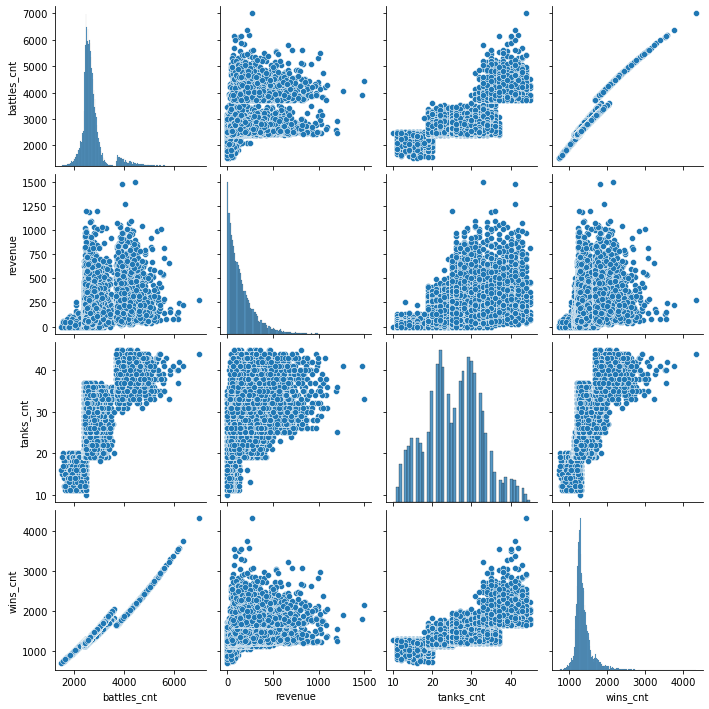

In [8]:
plt.figure(figsize=(16,9))
sns.pairplot(df);

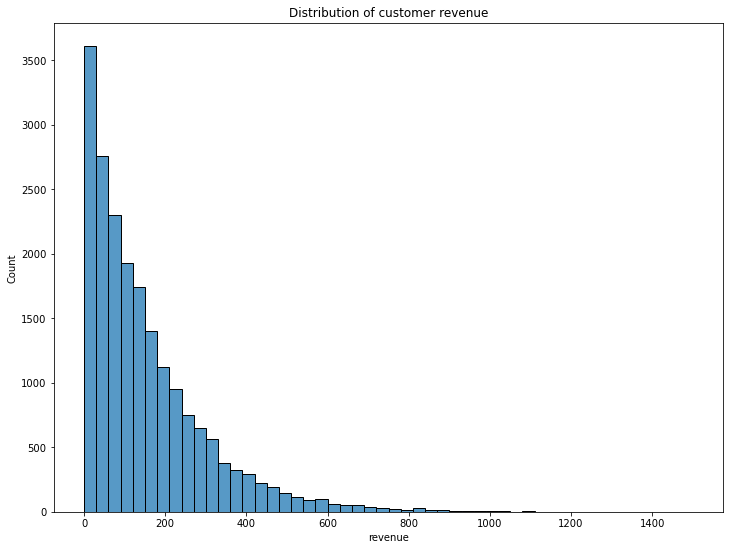

In [9]:
plt.figure(figsize=(12,9))
sns.histplot(df['revenue'], bins=50)
plt.title("Distribution of customer revenue");

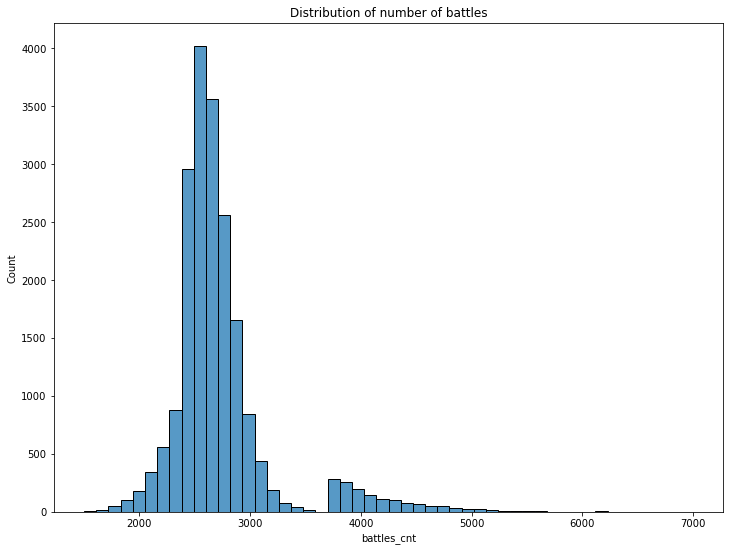

In [10]:
plt.figure(figsize=(12,9))
sns.histplot(df['battles_cnt'], bins=50)
plt.title("Distribution of number of battles");

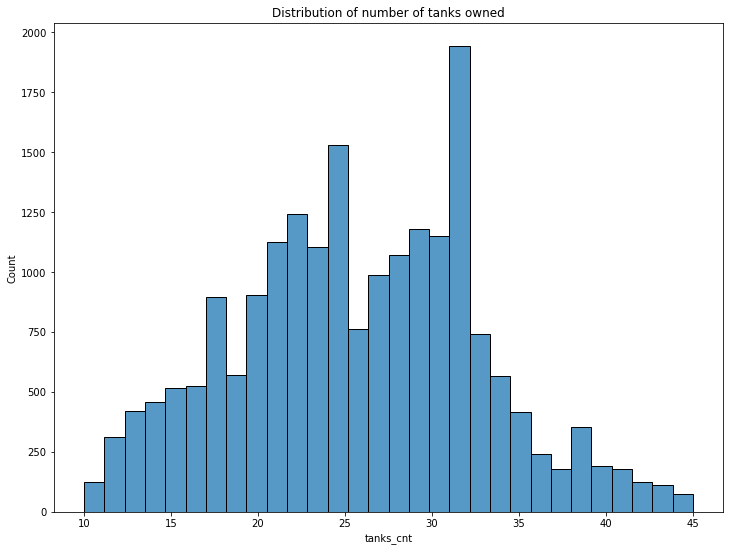

In [11]:
plt.figure(figsize=(12,9))
sns.histplot(df['tanks_cnt'],bins=30)
plt.title("Distribution of number of tanks owned");

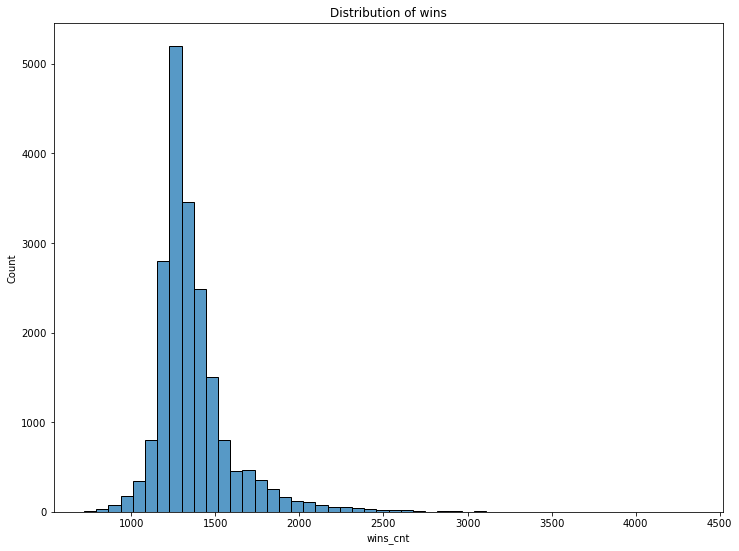

In [12]:
plt.figure(figsize=(12,9))
sns.histplot(df['wins_cnt'], bins=50)
plt.title("Distribution of wins");

## Preparing

In [13]:
# Let's prepare our X matrix
sc = StandardScaler()
X_sc = sc.fit_transform(df)

Calculating the inertia of each cluster

**Inertia** -- sum of squared errors for each cluster.
- low inertia = dense cluster

> As the number of clusters k increases, inertia decreases. 

**Silhouette Score** 

- measure of how far apart clusters are
- high Silhouette = clusters are well separated

In [14]:
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k, random_state=24)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [15]:
score_df.head()

,k,inertia,silhouette
0,2,47001.249206,0.610521
1,3,30333.181344,0.373578
2,4,23897.647221,0.348333
3,5,20364.420945,0.331651
4,6,17823.976109,0.330664


Text(0.5, 1.0, 'Silhouette Score over k')

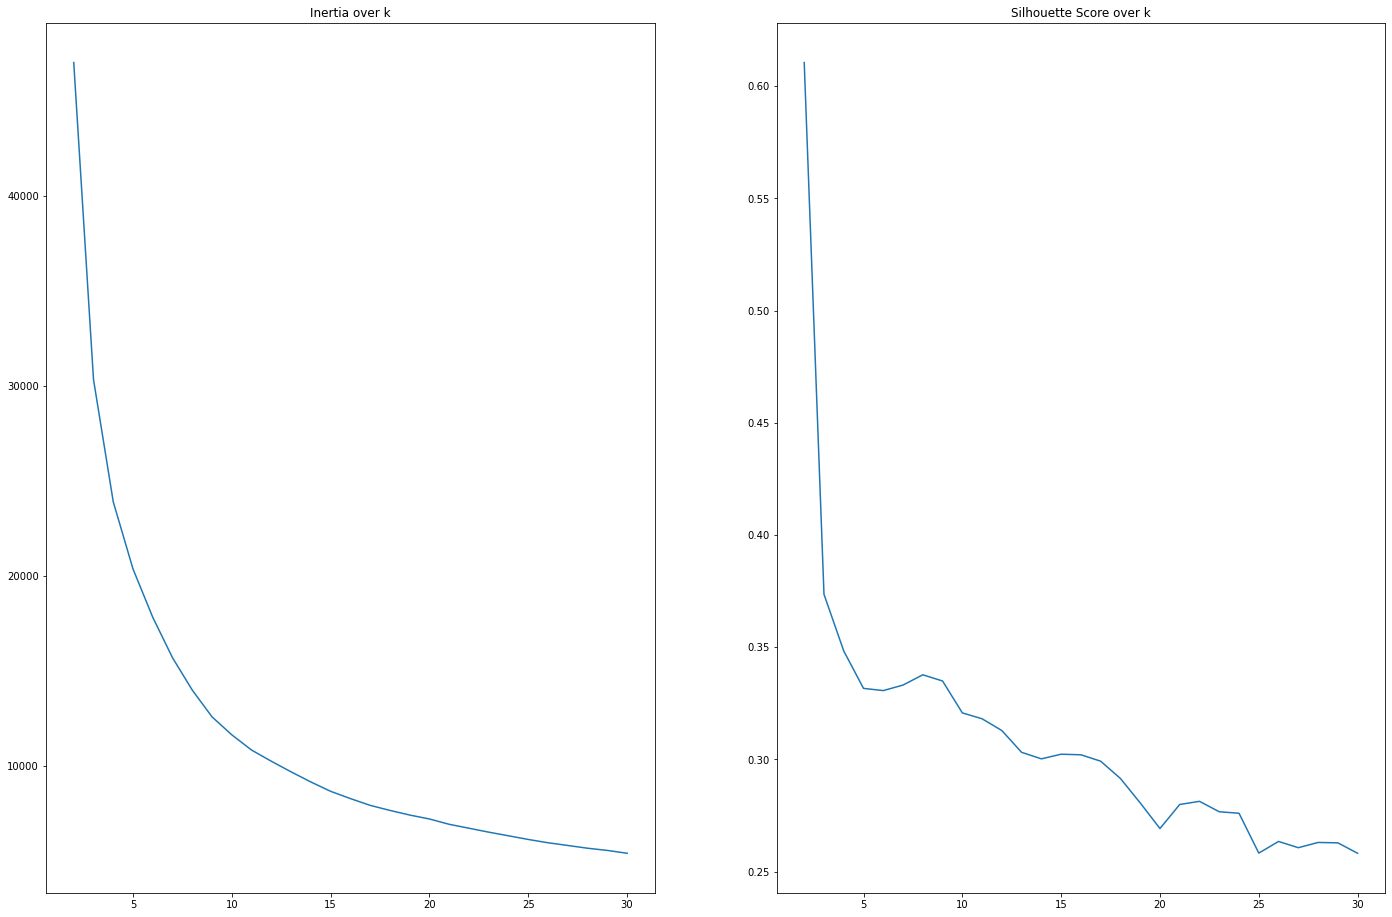

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(24, 16))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [17]:
km = KMeans(n_clusters=5, random_state=24)
km.fit(X_sc)
df['cluster'] = km.labels_

In [18]:
df.head()

,battles_cnt,revenue,tanks_cnt,wins_cnt,cluster
user_id,,,,,
1061412,2192,19.174884,13,1113,0
1054424,2412,15.450320,13,1246,0
1623843,2191,0.000000,15,1112,0
1074361,2152,32.013415,16,1089,0
1046207,2430,15.989244,13,1257,0


# Checking the clusters

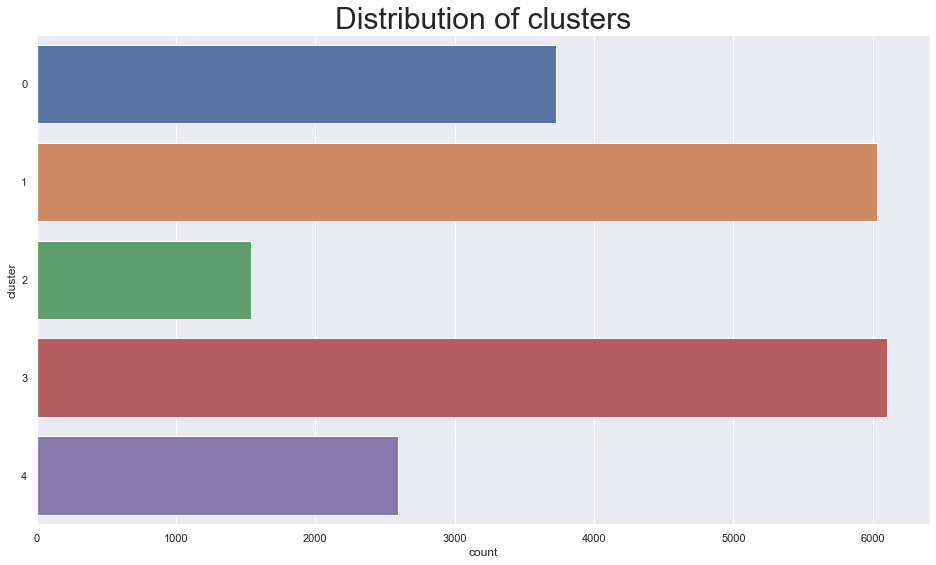

In [40]:
# distribution of score
plt.figure(figsize=(16,9))
plt.title('Distribution of clusters' , fontsize=30)
sns.countplot(y=df['cluster'])
sns.set(font_scale=2)
sns.set()

In [49]:
df['cluster'].value_counts(sort=False)

0    3726
1    6035
2    1539
3    6104
4    2596
Name: cluster, dtype: int64

In [50]:
df['cluster'].value_counts(normalize=True, sort=False)

0    0.18630
1    0.30175
2    0.07695
3    0.30520
4    0.12980
Name: cluster, dtype: float64

<Figure size 1152x648 with 0 Axes>

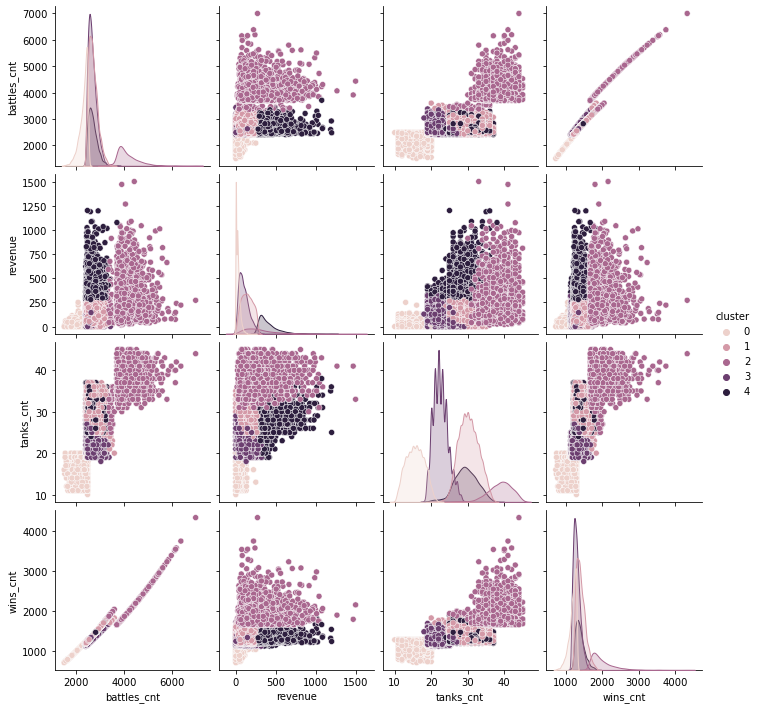

In [21]:
plt.figure(figsize=(16,9))
sns.pairplot(data = df, hue='cluster');

- Segment 0: Casual players with lowest attributes
- Segment 1: Main demographic of WoT players
- Segment 2: Competitive players with highest skill cap
- Segment 3: Main demographic of WoT players
- Segment 4: Players who are willing to spend


In [59]:
df.groupby('cluster')['revenue'].describe()['mean']

cluster
0     22.308705
1    139.839236
2    301.909487
3     99.279571
4    407.041292
Name: mean, dtype: float64

In [61]:
df.groupby('cluster')['tanks_cnt'].describe()['mean']

cluster
0    15.559313
1    30.187241
2    38.725796
3    22.479194
4    29.397535
Name: mean, dtype: float64

In [62]:
df.groupby('cluster')['battles_cnt'].describe()['mean']

cluster
0    2301.118894
1    2709.125932
2    4140.487979
3    2671.959207
4    2687.332820
Name: mean, dtype: float64

In [63]:
df.groupby('cluster')['wins_cnt'].describe()['mean']

cluster
0    1175.335749
1    1403.255675
2    1981.833658
3    1290.612385
4    1384.672573
Name: mean, dtype: float64

In [73]:
df_info = pd.DataFrame(df.groupby('cluster')['revenue'].describe()['mean'])
df_info.rename(columns = {'mean': 'revenue'}, inplace=True)
df_info['tanks_cnt'] = df.groupby('cluster')['tanks_cnt'].describe()['mean']
df_info['battles_cnt'] = df.groupby('cluster')['battles_cnt'].describe()['mean']
df_info['wins_cnt'] = df.groupby('cluster')['wins_cnt'].describe()['mean']

In [74]:
df_info

,revenue,tanks_cnt,battles_cnt,wins_cnt
cluster,,,,
0,22.308705,15.559313,2301.118894,1175.335749
1,139.839236,30.187241,2709.125932,1403.255675
2,301.909487,38.725796,4140.487979,1981.833658
3,99.279571,22.479194,2671.959207,1290.612385
4,407.041292,29.397535,2687.332820,1384.672573
